# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities Using the ***citipy*** Library

In [2]:
# create empty list for holding lat long
lat_lons = []

# empty list for city names
cities = []

# range of latitudes and longitudes
lat_range = (-90, 90)
lon_range = (-180,180)

# create set of random coordinates
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lons = np.random.uniform(lon_range[0], lon_range[1], size=1500)
lat_lons = zip(lats, lons)

# find nearest city for each combination
for lat_lon in lat_lons:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name

    if city not in cities:
        cities.append(city)

# print city count to confirm
print(len(cities))

578


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# create lists for data:
city_list_2 = []
city_lat = []
city_lon = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []

# temp units 
temp_units = 'metric'

# set api base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&units={temp_units}&appid={weather_api_key}"

# define empty list for weather data per city
city_data = []

#print to logger
print('Beginning Data Retrieval     ')
print('-----------------------------')

# create counters
record_count = 1
set_count = 1

#loop through all the cities in our list to get weather data
for i, city in enumerate(cities):

    # group cities in sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        

    # create endpoint URL with each city
    city_url = url + '&q=' + city

    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # add 1 to record count 
    record_count += 1
    

    # run request
    try:
        city_weather = requests.get(city_url).json()

        # parse out data
        city_list_2.append(city_weather['name'])
        city_lat.append(city_weather['coord']['lat'])
        city_lon.append(city_weather['coord']['lon'])
        city_max_temp.append(city_weather['main']['temp_max'])
        city_humidity.append(city_weather['main']['humidity'])
        city_clouds.append(city_weather['clouds']['all'])
        city_wind.append(city_weather['wind']['speed'])
        city_country.append(city_weather['sys']['country'])
        city_date.append(city_weather['dt'])

    # if an error is experienced skip city
    except:
        print('city not found. Skipping...')
        pass

# Indicate that data loading is complete
print('------------------------------')
print('Data Retrieval Complete')
print('------------------------------')

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | churapcha
Processing Record 5 of Set 1 | pavlohrad
Processing Record 6 of Set 1 | cabo san lucas
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | rikaze
Processing Record 9 of Set 1 | vilyuysk
Processing Record 10 of Set 1 | jabor
Processing Record 11 of Set 1 | acarau
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | tabas
Processing Record 14 of Set 1 | taiohae
city not found. Skipping...
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | valparaiso
Processing Record 17 of Set 1 | okha
Processing Record 18 of Set 1 | flying fish cove
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | matamey
Processing Record 22 of Set 1

In [12]:
# convert the city data into a data frame
city_df = pd.DataFrame({
    'City': city_list_2,
    'Lat': city_lat,
    'Lon': city_lon,
    'Max Temp': city_max_temp,
    'Humidity': city_humidity,
    'Cloudiness': city_clouds,
    'Wind Speed': city_wind,
    'Country': city_country,
    'Date': city_date
})

city_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,12.73,58,100,1.79,AU,1690422208
1,Grytviken,-54.2811,-36.5092,0.87,98,100,5.05,GS,1690422208
2,Carnarvon,-24.8667,113.6333,17.39,51,30,7.11,AU,1690422208
3,Churapcha,62.0025,132.4325,22.66,33,19,4.34,RU,1690422571
4,Pavlohrad,48.5167,35.8667,19.24,75,7,3.66,UA,1690422572


In [16]:
# export data to a csv
city_df.to_csv('Output_data/cities.csv', index_label='City_ID')

In [19]:
#read saved data
city_data_df = pd.read_csv('Output_data/cities.csv', index_col='City_ID')
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,New Norfolk,-42.7826,147.0587,12.73,58,100,1.79,AU,1690422208
1,Grytviken,-54.2811,-36.5092,0.87,98,100,5.05,GS,1690422208
2,Carnarvon,-24.8667,113.6333,17.39,51,30,7.11,AU,1690422208
3,Churapcha,62.0025,132.4325,22.66,33,19,4.34,RU,1690422571
4,Pavlohrad,48.5167,35.8667,19.24,75,7,3.66,UA,1690422572


### Create the scatter plots requested

---

#### Latitude vs. Temperature

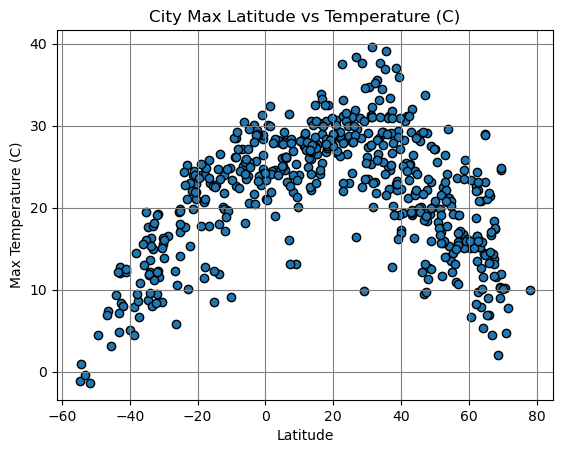

In [27]:
# create scatter plot
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors='Black')
plt.title('City Max Latitude vs Temperature (C)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True, which='major', axis='both', linestyle='-', color='grey')
plt.savefig('Figures/Fig_1.png')
plt.show()

#### Latitude vs Humidity

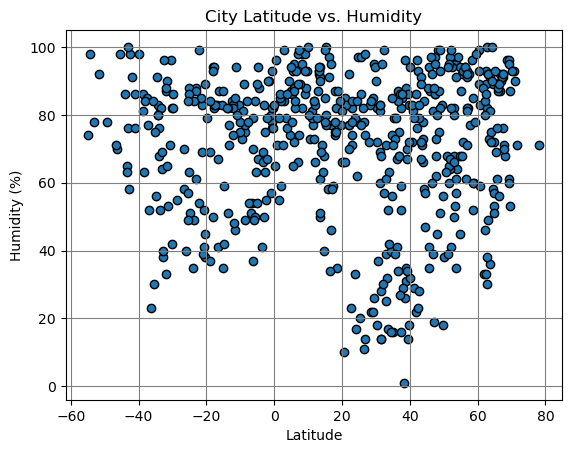

In [30]:
# build scatterplot
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True, which='major', axis='both', linestyle='-', color='grey')
plt.savefig('Figures/Fig_2.png')
plt.show()

#### Latitude vs. Cloudiness

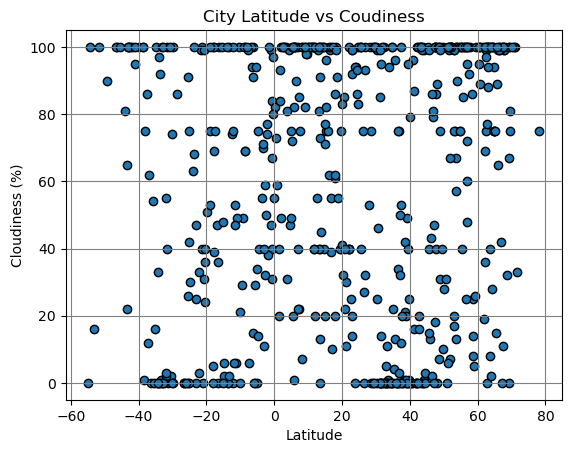

In [32]:
# create scatterplot
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')
plt.title('City Latitude vs Coudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True, which='major', axis='both', linestyle='-', color='grey')
plt.savefig('Figures/Fig_3.png')
plt.show()

#### Latitude vs Wind Speeds

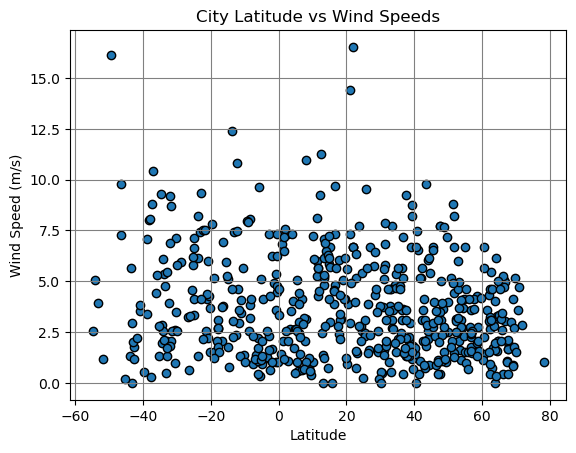

In [35]:
# build scatterplot
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')
plt.title('City Latitude vs Wind Speeds')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True, which='major', axis='both', linestyle='-', color='grey')
plt.savefig('Figures/Fig_4.png')
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [36]:
# define a function to create linear regression plots


In [44]:
# create a data frame with northern hemisphere data (latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]
northern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,Churapcha,62.0025,132.4325,22.66,33,19,4.34,RU,1690422571
4,Pavlohrad,48.5167,35.8667,19.24,75,7,3.66,UA,1690422572
5,Cabo San Lucas,22.8909,-109.9124,33.12,71,20,5.14,MX,1690422165
7,Xigazê,29.2500,88.8833,9.82,85,100,1.52,CN,1690422209
8,Vilyuysk,63.7553,121.6247,20.79,36,100,3.15,RU,1690422572


In [47]:
# create a data frame with southern hemisphere data (lat < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]
southern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,New Norfolk,-42.7826,147.0587,12.73,58,100,1.79,AU,1690422208
1,Grytviken,-54.2811,-36.5092,0.87,98,100,5.05,GS,1690422208
2,Carnarvon,-24.8667,113.6333,17.39,51,30,7.11,AU,1690422208
6,Port-aux-Français,-49.3500,70.2167,4.44,78,90,16.12,TF,1690422209
10,Acaraú,-2.8856,-40.1200,25.74,83,11,7.31,BR,1690422210


### Temperature vs Latitude Linear Regression Plot

In [54]:
# linear regression on northern hemisphere
north_linereg = st.linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
north_linereg

LinregressResult(slope=-0.2111996526925105, intercept=30.98065363964786, rvalue=-0.6020735977371885, pvalue=5.002305958345454e-40, stderr=0.014182536915366714, intercept_stderr=0.5972397021535503)

The r-value is -0.6020735977371885


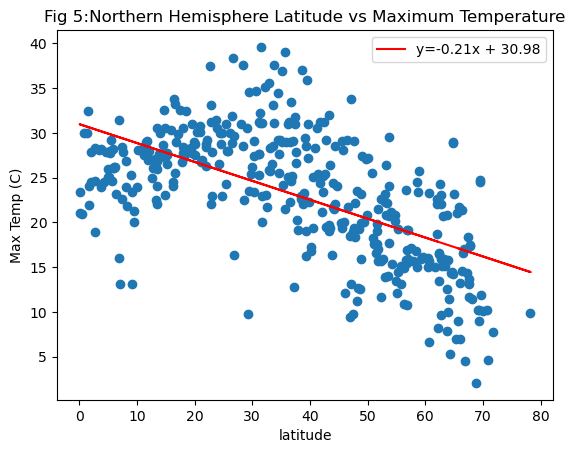

In [66]:
# regression line
slope_north = -0.2111996526925105
intercept_north = 30.98065363964786
rvalue_north = -0.6020735977371885

# create line formula
north_regline = slope_north * (northern_hemi_df['Lat']) + intercept_north

# plot scatterplot and add regression line
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.title('Fig 5:Northern Hemisphere Latitude vs Maximum Temperature')
plt.xlabel('latitude')
plt.ylabel('Max Temp (C)')

# add regression line
plt.plot(northern_hemi_df['Lat'], north_regline, 'r', label='y={:.2f}x + {:.2f}'.format(slope,intercept))
plt.legend()

# save graph
plt.savefig('Figures/Fig_5.png')

# show the plot
print(f"The r-value is {rvalue_north}")
plt.show()

In [60]:
# linear regression for southern hemisphere
south_linereg = st.linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
south_linereg

LinregressResult(slope=0.4471112345751573, intercept=27.882342152117413, rvalue=0.8403805200066826, pvalue=3.24405283790945e-45, stderr=0.022586168463333334, intercept_stderr=0.580144813347299)

The r-value is 0.8403805200066826


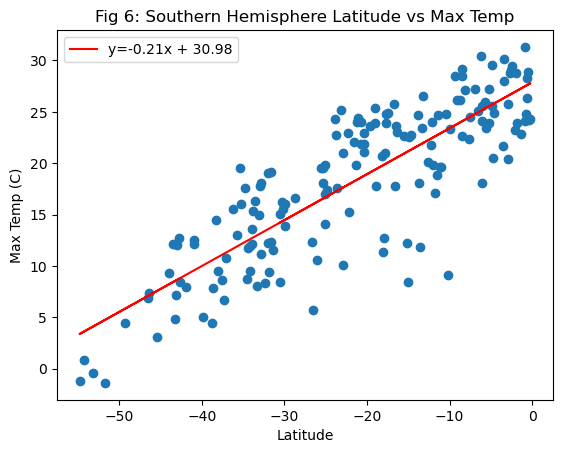

In [67]:
# regression line
slope_south = 0.4471112345751573
intercept_south = 27.882342152117413
rvalue_south = 0.8403805200066826

# create line formula
south_regline = slope_south * (southern_hemi_df['Lat']) + intercept_south

# plot the relationship
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.title('Fig 6: Southern Hemisphere Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')

# add regression line
plt.plot(southern_hemi_df['Lat'], south_regline, 'r', label='y={:.2f}x + {:.2f}'.format(slope,intercept))
plt.legend()

# save fig
plt.savefig('Figures/Fig_6.png')

# show the graph
print(f"The r-value is {rvalue_south}")
plt.show()

#### Discussion About Relationship:
##### We can observe that, as we approach the equator (Lat = 0) the temperatures increase. for Figure 5, there is a strong inverse linear relationship between Latitude and Maximum temperature, as latitude moves away from 0 the temperature steadily drops. Inversely, for Figure 6, we observe a strong positive linear relationship: as latitude approaches 0 we observe a steady increase in temperature

### Humidity vs Latitude linear regression plot

In [68]:
# Northern Hemisphere
humidity_reg_north = st.linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
humidity_reg_north

LinregressResult(slope=-0.03847335220463229, intercept=72.99435565703648, rvalue=-0.03414140944187321, pvalue=0.5003092365557232, stderr=0.05702864023944645, intercept_stderr=2.4015286062062255)

The r-value is -0.03414140944187321


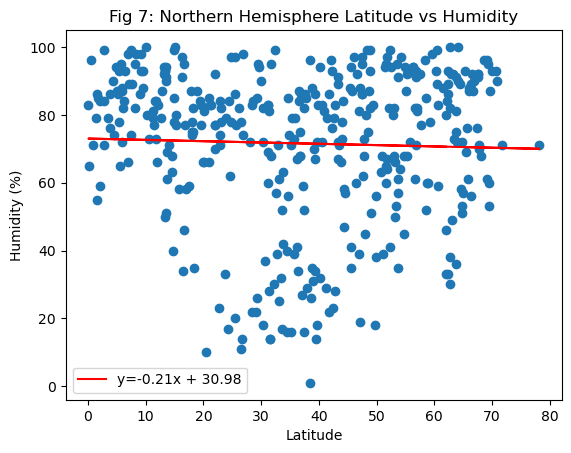

In [69]:
slope_hum_north = -0.03847335220463229
intercept_hum_north = 72.99435565703648
rvalue_hum_north = -0.03414140944187321

# create regression line
hum_north_regline = slope_hum_north * (northern_hemi_df['Lat']) + intercept_hum_north

# plot the relationship 
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.title('Fig 7: Northern Hemisphere Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# add regression line
plt.plot(northern_hemi_df['Lat'], hum_north_regline, 'r', label='y={:.2f}x + {:.2f}'.format(slope,intercept))
plt.legend()

# save fig
plt.savefig('Figures/Fig_7.png')

# show chart
print(f"The r-value is {rvalue_hum_north}")
plt.show()

In [71]:
# southern hemisphere
humidity_reg_south = st.linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
humidity_reg_south

LinregressResult(slope=-0.11041728138820558, intercept=68.98942631246214, rvalue=-0.08728802590530015, pvalue=0.2649188294073246, stderr=0.0987024090977601, intercept_stderr=2.5352547421183065)

The r-value is -0.08728802590530015


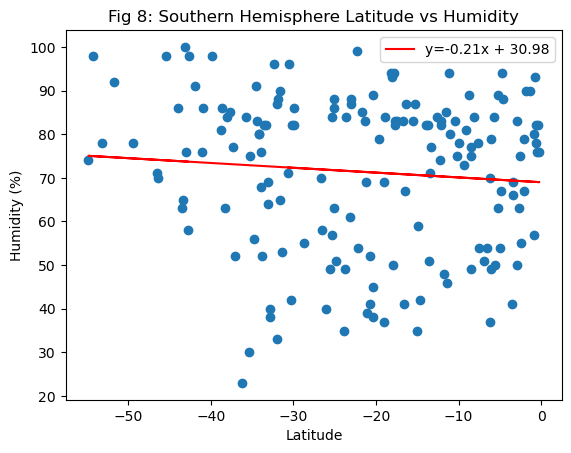

In [72]:
slope_hum_south = -0.11041728138820558
intercept_hum_south = 68.98942631246214
rvalue_hum_south = -0.08728802590530015

# create reg line
hum_south_regline = slope_hum_south * (southern_hemi_df['Lat']) + intercept_hum_south

# create scatter
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.title('Fig 8: Southern Hemisphere Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# add regression line
plt.plot(southern_hemi_df['Lat'], hum_south_regline, 'r', label='y={:.2f}x + {:.2f}'.format(slope,intercept))
plt.legend()

# save fig
plt.savefig('Figures/Fig_8.png')

# show plot 
print(f"The r-value is {rvalue_hum_south}")
plt.show()

#### Discussion:
##### we can see no observable correlation between latitude and humidity levels across both figures. In both cases, the correlation coefficient is near zero. From this we can extract that there isnt a relationship between latitude and humidity levels. This almost certainly means that there are other factors that determine humidity in any given latitude throughout the globe

### Cloudiness vs Latitude Linear Regression Plot

In [73]:
# northern hemisphere
cloud_reg_north = st.linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
cloud_reg_north

LinregressResult(slope=0.054369469237159705, intercept=58.95749283846097, rvalue=0.027596909436502153, pvalue=0.5859255991272125, stderr=0.09972335967558613, intercept_stderr=4.199442595200777)

The r-value is 0.027596909436502153


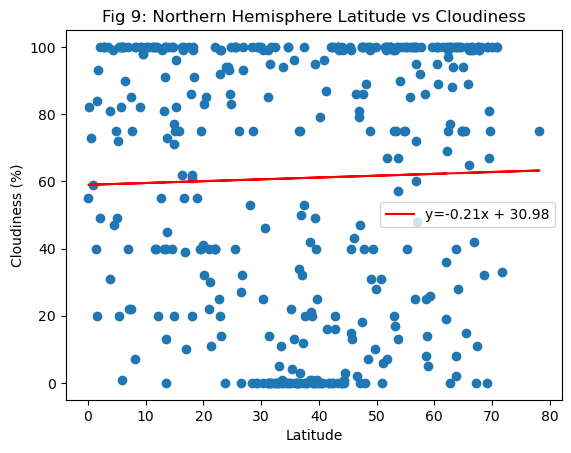

In [74]:
slope_cloud_north = 0.054369469237159705
intercept_cloud_north = 58.95749283846097
rvalue_cloud_north = 0.027596909436502153

# create regression line
cloud_north_regline = slope_cloud_north * (northern_hemi_df['Lat']) + intercept_cloud_north

# create scatterplot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.title('Fig 9: Northern Hemisphere Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# insert regression line
plt.plot(northern_hemi_df['Lat'], cloud_north_regline, 'r', label='y={:.2f}x + {:.2f}'.format(slope,intercept))
plt.legend()

# save fig
plt.savefig('Figures/Fig_9.png')

# show plot
print(f"The r-value is {rvalue_cloud_north}")
plt.show()

In [75]:
# southern hemisphere 
cloud_reg_south = st.linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
cloud_reg_south

LinregressResult(slope=-0.11536256406987432, intercept=49.03460720451083, rvalue=-0.04120325107279377, pvalue=0.5992600177912151, stderr=0.21911426252725155, intercept_stderr=5.628134897779071)

The r-value is -0.04120325107279377


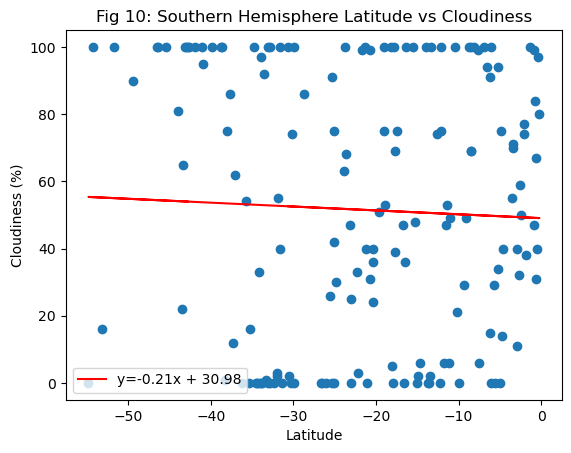

In [76]:
slope_cloud_south = -0.11536256406987432
intercept_cloud_south = 49.03460720451083
rvalue_cloud_south = -0.04120325107279377

# create regression line
cloud_south_regline = slope_cloud_south * (southern_hemi_df['Lat']) + intercept_cloud_south

# Create scatterplot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.title('Fig 10: Southern Hemisphere Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# add regression line
plt.plot(southern_hemi_df['Lat'], cloud_south_regline, 'r', label='y={:.2f}x + {:.2f}'.format(slope,intercept))
plt.legend()

# save fig
plt.savefig('Figures/Fig_10.png')

# show graph
print(f"The r-value is {rvalue_cloud_south}")
plt.show()

#### Discussion about the relationship:
##### In this analysis we can observe that in both scenarios there is a weak correlation between latitude and cloudiness. In Figure 9 we observe a weak inverspositive relationship between cloud coverage and latitude. Opposite this, there is a weak inverse relationship between cloud coverage and latitude. In my opinion, looking at the charts themselves and ignoring the r-value, there seems to be no observable relationship between the two variables across both hemispheres

### Wind Speed vs Latitude Linear Regression Plot

In [77]:
# Northern Hemisphere
wind_reg_north = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
wind_reg_north

LinregressResult(slope=-0.02237609956835108, intercept=4.362833499824224, rvalue=-0.18925254272566214, pvalue=0.00016379815512440488, stderr=0.005878820515820586, intercept_stderr=0.24756255068010044)

The r-value is -0.18925254272566214


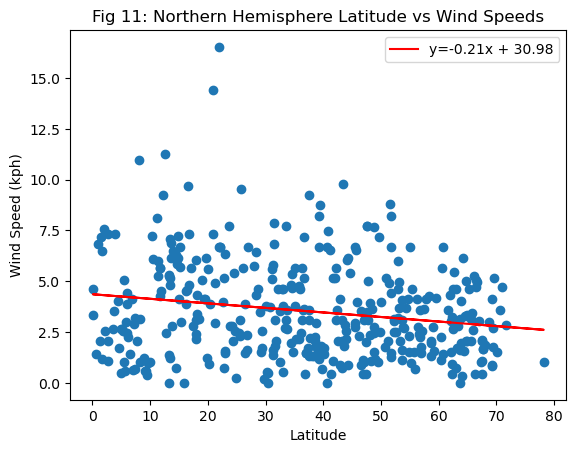

In [79]:
slope_wind_north = -0.02237609956835108
intercept_wind_north = 4.362833499824224
r_wind_north = -0.18925254272566214

# create regression equation
wind_north_regline = slope_wind_north * (northern_hemi_df['Lat']) + intercept_wind_north

# Create scatterplot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.title('Fig 11: Northern Hemisphere Latitude vs Wind Speeds')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (kph)')

# Add regression line
plt.plot(northern_hemi_df['Lat'], wind_north_regline, 'r', label='y={:.2f}x + {:.2f}'.format(slope,intercept))
plt.legend()

# save figure
plt.savefig('Figures/Fig_11.png')

# show plot
print(f"The r-value is {r_wind_north}")
plt.show()

In [80]:
# southern hemisphere
wind_reg_south = st.linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
wind_reg_south

LinregressResult(slope=-0.02355329132800147, intercept=3.487492755278094, rvalue=-0.11859971306506975, pvalue=0.12921133335397852, stderr=0.01544536261852257, intercept_stderr=0.39672718407067536)

The r-value is -0.11859971306506975


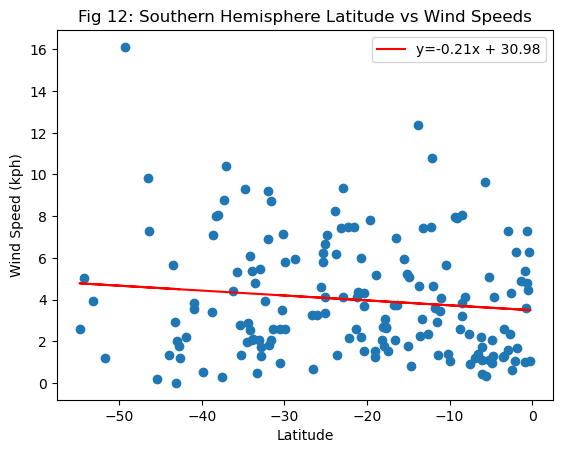

In [81]:
slope_wind_south = -0.02355329132800147
intercept_wind_south = 3.487492755278094
r_wind_south = -0.11859971306506975

# create regression line 
wind_south_regline = slope_wind_south * (southern_hemi_df['Lat']) + intercept_wind_south

# create scatterploy
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.title('Fig 12: Southern Hemisphere Latitude vs Wind Speeds')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (kph)')

# plot regression line
plt.plot(southern_hemi_df['Lat'], wind_south_regline, 'r', label='y={:.2f}x + {:.2f}'.format(slope,intercept))
plt.legend()

# save figure
plt.savefig('Figures/Fig_12')

#show
print(f"The r-value is {r_wind_south}")
plt.show()

#### Discussion about the linear relationship

##### we can observe in both graphs a weak inverse linear relationship between latitude and wind speeds. further testing would be interesting as its very likely the regression line for Figure 12 is affected by an outlier in the data at around latitude -50.